In [8]:
import pandas as pd
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import collections as c
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
gb_model = pickle.load(open('gradient_boost_completion_first_half.p', 'rb')) # load the model

In [10]:
# gb_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
#               learning_rate=0.01, loss='deviance', max_depth=5,
#               max_features='auto', max_leaf_nodes=None,
#               min_impurity_decrease=0.0, min_impurity_split=None,
#               min_samples_leaf=1, min_samples_split=2,
#               min_weight_fraction_leaf=0.0, n_estimators=1000,
#               n_iter_no_change=None, presort='auto', random_state=None,
#               subsample=0.1, tol=0.0001, validation_fraction=0.1,
#               verbose=0, warm_start=False)

In [17]:
def standard_confusion_matrix(y_true, y_pred):
    """Make confusion matrix with format:
                  -----------
                  | TP | FP |
                  -----------
                  | FN | TN |
                  -----------
    Parameters
    ----------
    y_true : ndarray - 1D
    y_pred : ndarray - 1D

    Returns
    -------
    ndarray - 2D
    """
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def print_roc_curve(y_test, probabilities, model_type):
    '''
    Calculates and prints a ROC curve given a set of test classes and probabilities from a trained classifier
    '''
    tprs, fprs, thresh = roc_curve(y_test, probabilities)
    plt.figure(figsize=(12,10))
    plt.plot(fprs, tprs, 
         label=model_type, 
         color='red')
    plt.plot([0,1],[0,1], 'k:')
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve AUC: {} Recall: {}".format(roc_auc, recall))
    plt.show()

In [13]:
# X_train = pd.read_csv('../data/processed/X_train.csv')
# y_train = pd.read_csv('../data/processed/y_train.csv')
# y_train = y_train['module_not_completed']
X_test = pd.read_csv('../data/processed/first_half/X_test.csv')
y_test = pd.read_csv('../data/processed/first_half/y_test.csv')
y_test = y_test['module_not_completed']

# fill
X_test.fillna(value = 0, inplace = True)

In [14]:
    predictions = gb_model.predict(X_test)
    roc_auc = roc_auc_score(y_test, predictions)
    probas = gb_model.predict_proba(X_test)[:, :1]
    tprs, fprs, thresh = roc_curve(y_test, probas)
    recall = recall_score(y_test, predictions)
    conf_mat = standard_confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

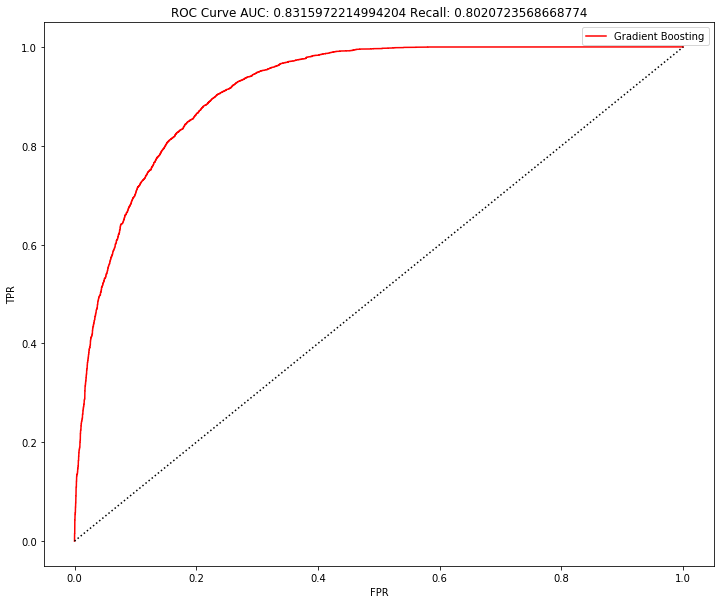

Best Model: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.1, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Roc Auc: 0.8315972214994204

Recall Score: 0.8020723568668774

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.86      0.83      5062
        True       0.87      0.80      0.83      5694

   micro avg       0.83      0.83      0.83     10756
   macro avg       0.83      0.83      0.83     10756
weighted avg       0.83      0.83      0.83     10756


Confusion Matrix:
 [[45

In [18]:
    print_roc_curve(y_test, probas, 'Gradient Boosting')
    print('Best Model: {}'.format(gb_model))
    print('\nRoc Auc: {}'.format(roc_auc))
    print('\nRecall Score: {}'.format(recall))
    print('\nClassification Report:\n {}'.format(class_report))
    print('\nConfusion Matrix:\n {}'.format(standard_confusion_matrix(y_test, predictions)))

In [13]:
# pickle.dump(model, open('gradient_boost_completion.p', 'wb')) # save the model